### Initialization and basics

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import os

In [3]:
## Importing datasets
G1 = nx.read_edgelist('dataset1.txt',create_using = nx.Graph(), nodetype = int)
G2 = nx.read_edgelist('dataset2.txt',create_using = nx.Graph(), nodetype = int)
G3 = nx.read_edgelist('dataset3.txt',create_using = nx.Graph(), nodetype = int)

# Saving degree frequency histogram for graphs
degree_freq1 = nx.degree_histogram(G1)
degree_freq2 = nx.degree_histogram(G2)
degree_freq3 = nx.degree_histogram(G3)

### Ploting degree distribution plot for all datasets

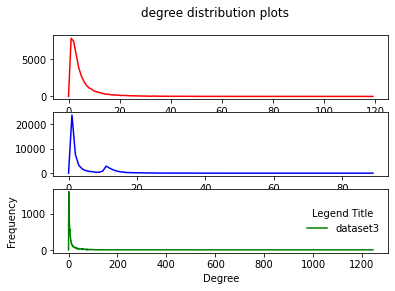

In [4]:
figure, axis = plt.subplots(3, 1)
figure.suptitle('degree distribution plots')
axis[0].plot(degree_freq1, color="red", label="dataset1")
axis[1].plot(degree_freq2, color="blue", label="dataset2")
axis[2].plot(degree_freq3, color="green", label="dataset3")
plt.legend(loc="right", title="Legend Title", frameon=False)
plt.ylabel('Frequency')
plt.xlabel('Degree')
plt.show()

### Ploting log-log degree distribution plot for all datasets

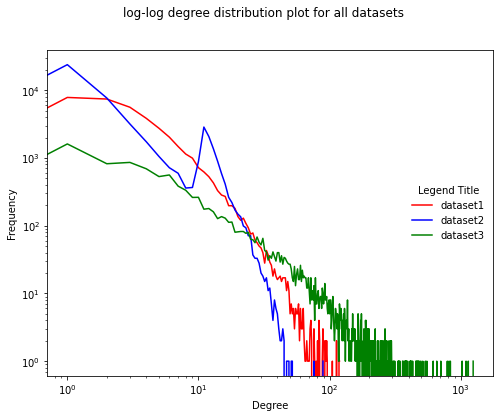

In [5]:
fig, ax = plt.subplots(1, figsize=(8, 6))
fig.suptitle('log-log degree distribution plot for all datasets')
ax.loglog(degree_freq1, color="red", label="dataset1")
ax.loglog(degree_freq2, color="blue", label="dataset2")
ax.loglog(degree_freq3, color="green", label="dataset3")
plt.legend(loc="right", title="Legend Title", frameon=False)
plt.ylabel('Frequency')
plt.xlabel('Degree')
plt.show()

### Printing important parameters

In [6]:
# Average clustering coefficient
print('average clustering coefficient for dataset1: ' + str(round(nx.average_clustering(G1), 6)) + "\n" + 
      'average clustering coefficient for dataset2: ' + str(round(nx.average_clustering(G2), 6)) + "\n" + 
      'average clustering coefficient for dataset3: ' + str(round(nx.average_clustering(G3), 6)))

average clustering coefficient for dataset1: 0.450703
average clustering coefficient for dataset2: 0.004425
average clustering coefficient for dataset3: 0.493101


In [7]:
# Average degree
G_deg_sum1 = [a * b for a, b in zip(degree_freq1, range(0, len(degree_freq1)))]
print('average degree for dataset1: {}'.format(sum(G_deg_sum1) / G1.number_of_nodes())[:34])

G_deg_sum2 = [a * b for a, b in zip(degree_freq2, range(0, len(degree_freq2)))]
print('average degree for dataset2: {}'.format(sum(G_deg_sum2) / G2.number_of_nodes())[:34])

G_deg_sum3 = [a * b for a, b in zip(degree_freq3, range(0, len(degree_freq3)))]
print('average degree for dataset3: {}'.format(sum(G_deg_sum3) / G1.number_of_nodes())[:34])

average degree for dataset1: 5.354
average degree for dataset2: 4.396
average degree for dataset3: 5.600


### Average Shortest Path

In [ ]:
# Since the graph is not connected we first store the graphs' connected subgraphs and then for each of
# them we calculate avg path and then calculate avg path for the whole graph using weighted averaging.
# We use subgraph size as an parameter for weighted averaging for the whole graph.

sum1 = 0
subgraphs_G1 = list(G1.subgraph(c) for c in nx.connected_components(G1))
for g in subgraphs_G1:
    sum1 = sum1 + nx.average_shortest_path_length(g)*g.size()
avg_path_G1 = sum1/G1.size()

sum2 = 0
subgraphs_G2 = list(G2.subgraph(c) for c in nx.connected_components(G2))
for g in subgraphs_G2:
    sum2 = sum2 + nx.average_shortest_path_length(g)*g.size()
avg_path_G2 = sum2/G2.size()    

sum3 = 0
subgraphs_G3 = list(G3.subgraph(c) for c in nx.connected_components(G3))
for g in subgraphs_G3:
    sum3 = sum3 + nx.average_shortest_path_length(g)*g.size()
avg_path_G3 = sum3/G3.size()    

In [ ]:
# Printing average shortest path
print('average shortest path for dataset1: ' + str(round(avg_path_G1, 6)) + "\n" + 
      'average shortest path for dataset2: ' + str(round(avg_path_G2, 6)) + "\n" + 
      'average shortest path for dataset3: ' + str(round(avg_path_G3, 6)))